In [629]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
from enum import Enum
import scipy.constants as sc
from tensorboard.backend.event_processing.event_file_loader import EventFileLoader

In [630]:
PATHS = {
        "working_dir": "./python/basic_rl_env",
        "results_dir": "../basic_rl_env/results/",
        "results_archive_dir": "../basic_rl_env/results_archive/"
    }

In [631]:

all_runs = {}
for file in os.listdir(Path(PATHS["results_dir"]).absolute()):
    all_runs[file.split("_")[0]] = Path(PATHS["results_dir"]+file).absolute()
for file in os.listdir(Path(PATHS["results_archive_dir"]).absolute()):
    all_runs[file.split("_")[0]] = Path(PATHS["results_archive_dir"]+file).absolute()

In [632]:
class Tag(Enum):
    CUMULATIVE_REWARD = "Environment/Cumulative Reward"
    EP_LENGTH = "Environment/Episode Length"

tag_colors = {
    Tag.CUMULATIVE_REWARD: "C1",
    Tag.EP_LENGTH: "C2"
    }

Select from what run to get data. Also choose the Type of data.

In [633]:
selected_run = 1195
plot_all = True
selected_tag = Tag.CUMULATIVE_REWARD

In [640]:
# Get the tfevents file associated with the current run.
path_to_result_folder = all_runs[str(selected_run)] / "RollerAgent/"
path_to_result = sorted(Path(path_to_result_folder).glob("events.out.tfevents.*"))[0]

y_values = {
    Tag.CUMULATIVE_REWARD: [],
    Tag.EP_LENGTH: []
}
x_values = []
for event in EventFileLoader(str(path_to_result)).Load():
    # event = event_pb2.Event.FromString(batch.numpy())
    #y_values.append(event)
    for value in event.summary.value:
        if value.tag == Tag.CUMULATIVE_REWARD.value:
            y_values[Tag.CUMULATIVE_REWARD].append(value.tensor.float_val[0])
            
        if value.tag == Tag.EP_LENGTH.value:
            y_values[Tag.EP_LENGTH].append(value.tensor.float_val[0])
    x_values.append(event.step)
#y_values = y_values[::10]
len(y_values[Tag.CUMULATIVE_REWARD])

500

In [635]:
for tag in y_values:
    assert len(x_values) == len(y_values[tag])

AssertionError: 

In [636]:
#x_values = [10000 * i for i in range(len(y_values))]

In [637]:
if not plot_all:#plt.rcParams["savefig.facecolor"] = "#000000"
#plt.rcParams["figure.facecolor"] = "#222222"
    fig = plt.figure()
    fig.patch.set_alpha(0.)

    plt.plot(x_values, y_values ,label="Run", color=tag_colors[selected_tag])
    plt.hlines(1.0, x_values[0], x_values[-1], label="Expected reward limit = 1.0", color="C3", linestyles="dashed")
    plt.title(f"Run {selected_run}, {selected_tag.value}")
    plt.xlabel("Step")
    plt.ylabel("Reward")
    plt.ylim(-5, 1.2)
    plt.legend()
    plt.grid()

    plt.savefig(f"{selected_run}_{selected_tag}.pdf")

ValueError: x and y must have same first dimension, but have shapes (3183,) and (500,)

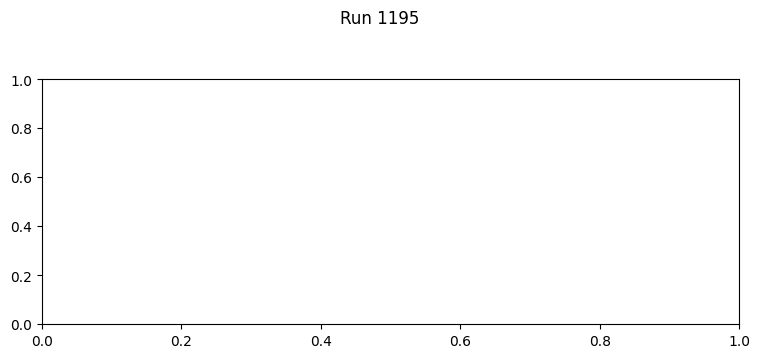

In [638]:
if plot_all:
    fig = plt.figure(figsize=(9, 7))
    #fig = plt.figure()
    fig.patch.set_alpha(0.)
    
    gs = fig.add_gridspec(ncols=1, nrows=2, figure=fig)

    # First plot.
    selected_tag = Tag.CUMULATIVE_REWARD
    axs_first = fig.add_subplot(gs[0, 0])
    fig.suptitle(f"Run {selected_run}")
    axs_first.plot(x_values, y_values[selected_tag] , color=tag_colors[selected_tag])
    axs_first.axhline(1.0, label="Expected reward limit = 1.0", color="C3", linestyle="dashed")
    axs_first.set_ylim(-5, 1.5)
    axs_first.set_title(selected_tag.value.split("/")[-1])
    axs_first.set_xlabel("Step")
    axs_first.set_ylabel("Reward")
    axs_first.legend()
    axs_first.grid()

    # Second plot.
    selected_tag = Tag.EP_LENGTH
    axs_second = fig.add_subplot(gs[1, 0])
    axs_second.plot(x_values, y_values[selected_tag], color=tag_colors[selected_tag])
    axs_second.set_title(selected_tag.value.split("/")[-1])
    axs_second.set_ylim(0, 200)
    axs_second.set_xlabel("Step")
    axs_second.set_ylabel("Actions")
    axs_second.grid()
    #axs_second.legend()

    plt.subplots_adjust(hspace=0.4)

    #plt.savefig(f"{selected_run}_all.pdf")
    fig.savefig(f"{selected_run}_all.pdf")